In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

In [79]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Basic Questions I would like to answer

1) Who were the passengers on the Titanic? (Ages, Gender, Class,... etc)
2) What deck were the passengers on and how does that relate to their class?
3) Where did the passengers come from?
4) Who was alone and who was with family?

# Tackling the first question:

In [5]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot: >

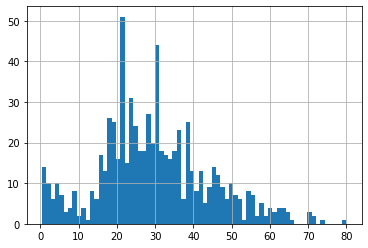

In [6]:
df.Age.hist(bins=70)

By observing the graph we can see that most people in titanic were adults ranging from 20 to 30 years old.

The oldest person were about 80 years old.
There were some kids.

<AxesSubplot: >

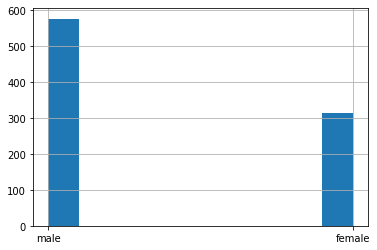

In [7]:
df.Sex.hist()

In [8]:
(len(df[df.Sex=='male'])/len(df))*100

64.75869809203144

Most of the passagers are male. About 65% of the passengers.

In [9]:
import seaborn as sns

<AxesSubplot: xlabel='Pclass', ylabel='Count'>

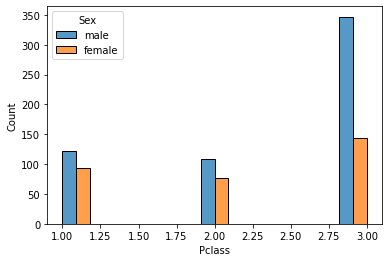

In [15]:
sns.histplot(data=df,x='Pclass',hue='Sex',multiple='dodge')

In [16]:
def stage_of_life(passenger):
    Age = passenger.Age
    if Age < 18:
        return 'Child'
    elif Age < 45:
        return 'Adult'
    else:
        return 'Elder'

In [18]:
df['Stage_of_life'] = df[['Age']].apply(stage_of_life,axis=1)

<AxesSubplot: xlabel='Pclass', ylabel='Count'>

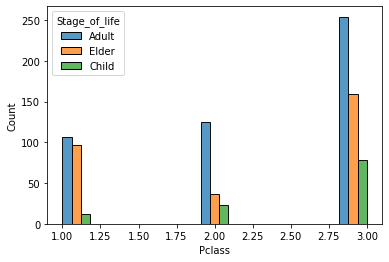

In [21]:
sns.histplot(data=df,x='Pclass',hue='Stage_of_life',multiple='dodge')

In [24]:
df['Stage_of_life'].value_counts()

Adult    486
Elder    292
Child    113
Name: Stage_of_life, dtype: int64

/home/vtex/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/vtex/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


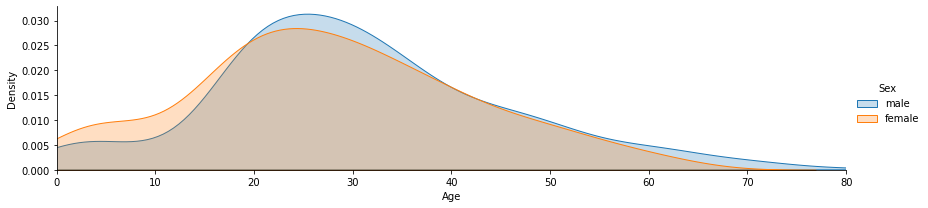

In [25]:
fig = sns.FacetGrid(df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

/home/vtex/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/vtex/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/vtex/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


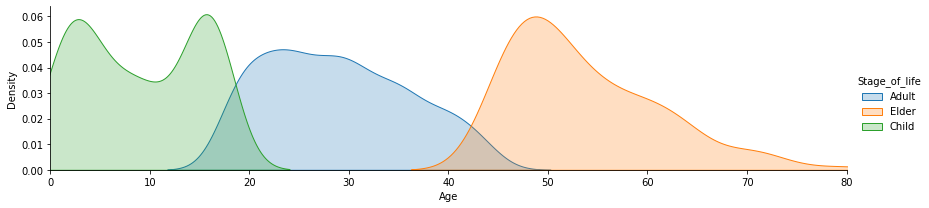

In [26]:
fig = sns.FacetGrid(df,hue='Stage_of_life',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Stage_of_life
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [90]:
cabins = df['Cabin'].dropna()

In [91]:
cabin_levels = cabins.str[0]

In [92]:
cabin_levels = cabin_levels[cabin_levels!='T']

<AxesSubplot: xlabel='Cabin', ylabel='Count'>

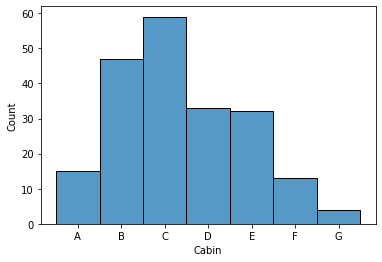

In [93]:
cabin_levels = cabin_levels.sort_values()
sns.histplot(cabin_levels)

Most passengers were on cabins B,C,D and E

<AxesSubplot: xlabel='Embarked', ylabel='Count'>

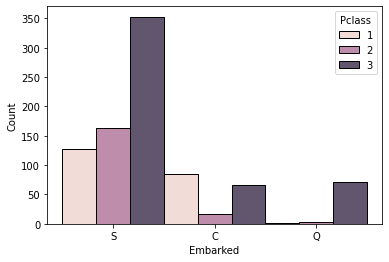

In [46]:
sns.histplot(data = df,x='Cabin', hue='Pclass',multiple='dodge')

In [47]:
df = df.dropna()

In [48]:
df['Cabin_level'] = df['Cabin'].str[0]

/tmp/ipykernel_18811/3343977025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin_level'] = df['Cabin'].str[0]


In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Stage_of_life,Cabin_level
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Elder,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Elder,C


In [50]:
df = df[df['Cabin_level']!='T']

<AxesSubplot: xlabel='Cabin_level', ylabel='Count'>

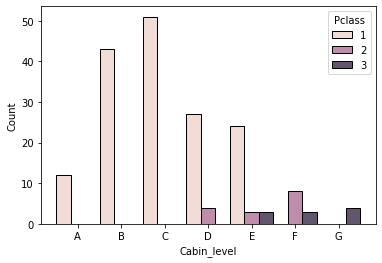

In [54]:
df = df.sort_values(by='Cabin_level')
sns.histplot(data = df,x='Cabin_level', hue='Pclass',multiple='dodge')

Here we can see the distributions of Passenger Class per cabin

In [60]:
df['Cabin_level'] = df['Cabin_level'].astype('category')

In [64]:
df2 = df.copy()
df2.Cabin_level = df.Cabin_level.cat.codes

In [65]:
df2[['Cabin_level','Pclass']].corr()

,Cabin_level,Pclass
Cabin_level,1.000000,0.608615
Pclass,0.608615,1.000000


### Now in order to check who was alone, and who had companions...

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Stage_of_life,Cabin_level
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,Elder,A
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,Elder,A
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C,Adult,A
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,Adult,A
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,Child,A


In [80]:
df['party_size'] = df['SibSp']+df['Parch']

In [81]:
df['alone'] = np.where(df['party_size']==0,'alone','not alone')

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,party_size,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,not alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,not alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,not alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,alone


<AxesSubplot: >

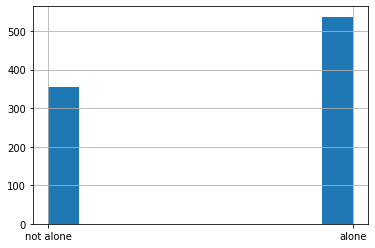

In [83]:
df.alone.hist()

In [86]:
df['Survived'] = df.Survived.map({0:'no',1:'yes'})

<AxesSubplot: >

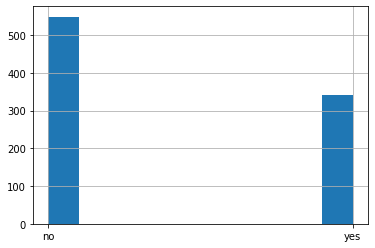

In [88]:
df.Survived.hist()

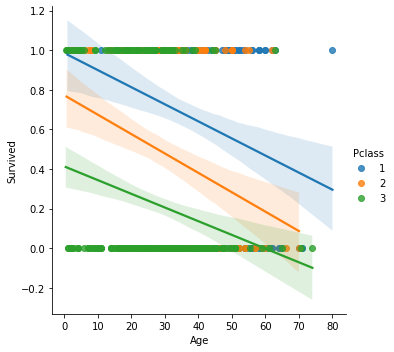

In [84]:
sns.lmplot(data=df,hue='Pclass',x='Age',y='Survived')

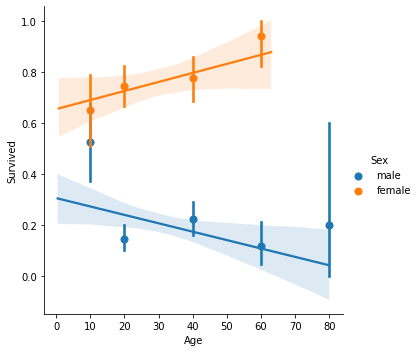

In [85]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=df,x_bins=[10,20,40,60,80])

<AxesSubplot: xlabel='Cabin_level', ylabel='Count'>

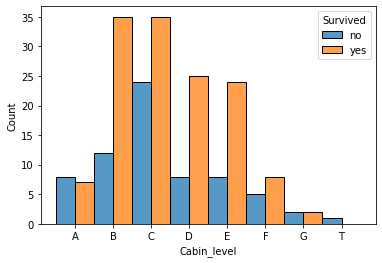

In [99]:
df['Cabin_level'] = df['Cabin'].str[0]
df = df.sort_values(by='Cabin_level')
sns.histplot(data = df,x='Cabin_level', hue='Survived',multiple='dodge')

<AxesSubplot: xlabel='alone', ylabel='Count'>

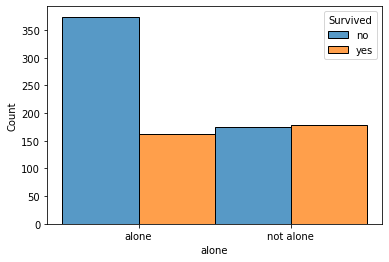

In [100]:
sns.histplot(data = df,x='alone', hue='Survived',multiple='dodge')